Experiment No 3

Write a program to perform regression tasks over given data using direct functions and
evaluate its performance.                 


NAME ATHARVA BALPANDE
ROll NO 313002
PRN 22111143
Div:C1

In [31]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [32]:
housing='housing.csv'
data=pd.read_csv(housing)
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [33]:
data.pop('ocean_proximity')
data.pop('total_bedrooms')


0         129.0
1        1106.0
2         190.0
3         235.0
4         280.0
          ...  
20635     374.0
20636     150.0
20637     485.0
20638     409.0
20639     616.0
Name: total_bedrooms, Length: 20640, dtype: float64

In [34]:
data

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,741.0,349.0,1.8672,84700.0


In [35]:
hnorm=(((data-data.min()))/(data.max()-data.min()))
hnorm.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [36]:
data.dtypes


longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
population            float64
households            float64
median_income         float64
median_house_value    float64
dtype: object

In [37]:
data.total_rooms

0         880.0
1        7099.0
2        1467.0
3        1274.0
4        1627.0
          ...  
20635    1665.0
20636     697.0
20637    2254.0
20638    1860.0
20639    2785.0
Name: total_rooms, Length: 20640, dtype: float64

In [38]:
target=data.pop('median_income')

In [39]:
print(data.columns.tolist())

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'population', 'households', 'median_house_value']


In [40]:
Y=target.values
X=hnorm.values
X.shape


(20640, 8)

In [41]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)
X_train

array([[0.30577689, 0.59511158, 0.70588235, ..., 0.09439237, 0.19991448,
        0.17422815],
       [0.61055777, 0.16578108, 0.66666667, ..., 0.12547278, 0.24974828,
        0.48886603],
       [0.187251  , 0.55366631, 0.98039216, ..., 0.07169873, 0.24199666,
        0.70515379],
       ...,
       [0.16035857, 0.76195537, 0.29411765, ..., 0.00608453, 0.08005407,
        0.        ],
       [0.60657371, 0.18065887, 0.66666667, ..., 0.06660089, 0.35919505,
        0.648453  ],
       [0.57370518, 0.18278427, 0.37254902, ..., 0.17316231, 0.45979366,
        0.70535998]])

In [42]:
model=keras.models.Sequential([
    keras.layers.Dense(8,activation="relu",input_shape=(8,)),
    keras.layers.Dense(1)
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 8)                 72        
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 81 (324.00 Byte)
Trainable params: 81 (324.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/10


516/516 [==============================] - 1s 961us/step - loss: 1.2157
Epoch 2/10
516/516 [==============================] - 1s 987us/step - loss: 0.7116
Epoch 3/10
516/516 [==============================] - 0s 957us/step - loss: 0.4756
Epoch 4/10
516/516 [==============================] - 1s 1ms/step - loss: 0.2161
Epoch 5/10
516/516 [==============================] - 1s 1ms/step - loss: 0.1503
Epoch 6/10
516/516 [==============================] - 1s 1ms/step - loss: 0.1460
Epoch 7/10
516/516 [==============================] - 1s 1ms/step - loss: 0.1424
Epoch 8/10
516/516 [==============================] - 0s 951us/step - loss: 0.1371
Epoch 9/10
516/516 [==============================] - 1s 1ms/step - loss: 0.1335
Epoch 10/10
2/2 [==============================] - 0s 2ms/step


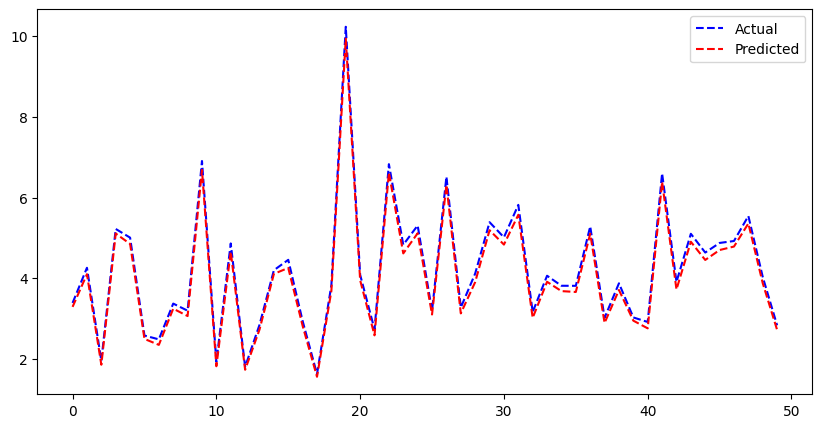

[0.97460627]


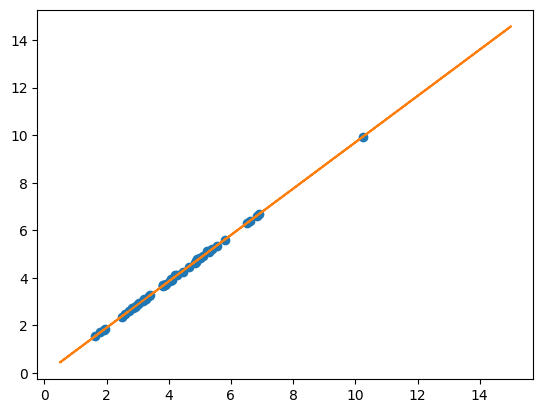

In [43]:
model.compile(loss="mae", optimizer="sgd")
history = model.fit(X_train, Y_train, epochs=10,verbose=1)
htest = model.evaluate(X_test, Y_test)
X_new = X_test[:50] # pretend these are new instances
y_pred = model.predict(X_new)
plt.figure(figsize=(10,5))
plt.plot(np.arange(0,len(X_new),1),Y_test[:50],'b--',label='Actual')
plt.plot(np.arange(0,len(X_new),1),y_pred,'r--',label='Predicted')
plt.legend()
plt.show()
plt.show()
#plt.scatter(y_test[:20],y_pred)
X_new = X_test[:50]
plt. plot(Y_test[:50],y_pred, 'o')
m, b = np. polyfit(Y_test[:50],y_pred, 1)
plt. plot(Y_test, m*Y_test+ b)
print(m)